## Introduction to Julia by Dr. Mohammad Masiur Rahaman (masiurr@iitbbs.ac.in)

## Conditionals

In Julia the syntax is

if **condition 1**
    
    *option 1*
    
elseif **condition 2**
    
    *option 2*
    
else 
    
    *option 3*
    
end

allows us to conditionally evaluate on of the options. 

In [3]:
x = 5
y = 5

if x>y
    println("x is larger than y")
elseif y>x
    println("x is smaller than y")
else 
    println("x and y are equal")
end

x and y are equal


### To return the larger of the two numbers

In [6]:
x = 8
y = 5

if x > y
   x
else
   y
end

8

#### We can use ternary operator with the sytanx

*condition ? value1 : value2* which is equivalent to 

if *condition*

   value1
   
else

   value2
   
end

In [8]:
x = 3
y = 3

(x>y) ? x : y

3

#### Short-circuit evaluation with the syntax

*condition && evaluation*

When we use **&&** evaluation is done only when the condition is true. If the condition is false,
then evaluation will not be done and simply give false.

In [11]:
x = 2
y = 3

3

In [12]:
(x>y) && println("$x is larger than $y")

false

In [13]:
(x<y) && println("$x is smaller than $y")

2 is smaller than 3


## Functions

### How to declare a function

#### Using the **function** and **end** keywords

In [14]:
function Welcome(name)
     println("Hi $name, it's great to see you!")
end

Welcome (generic function with 1 method)

In [15]:
Welcome("Students")

Hi Students, it's great to see you!


In [16]:
function f(x)
       x^2
end

f (generic function with 1 method)

In [17]:
f(3)

9

#### Declare the functions in a single line using **"="** sign

In [18]:
SayHello(name) = println("Hi $name, it's great to see you!")

SayHello (generic function with 1 method)

In [19]:
SayHello("Everyone")

Hi Everyone, it's great to see you!


In [20]:
g(x) = x^2

g (generic function with 1 method)

In [21]:
g(3)

9

#### Declare the functions as "anonymous" functions

In [22]:
SayHi = name -> println("Hi $name, it's great to see you!")

#1 (generic function with 1 method)

In [23]:
SayHi("All")

Hi All, it's great to see you!


In [24]:
h = x -> x^2

#3 (generic function with 1 method)

In [25]:
h(8)

64

### Duck-typing in Julia

*"If it quacks like a duck, its a duck."*

Julia functions will just work on whatever inputs make sense

For example, **Welcome** works on the name of this minor tv character, written as an integer.

In [26]:
Welcome(123456)

Hi 123456, it's great to see you!


In [39]:
A = [1 2; 2 3]

2×2 Matrix{Int64}:
 1  2
 2  3

In [41]:
f.(A)

2×2 Matrix{Int64}:
 1  4
 4  9

In [40]:
f(A)

2×2 Matrix{Int64}:
 5   8
 8  13

#### But **f** will not work on a vector **v**. 

Because, meaning of **v^2** is ambigious

In [34]:
v = rand(3)

3-element Vector{Float64}:
 0.2905715205337669
 0.42976336294215756
 0.17968860468085368

In [36]:
f.(v)

3-element Vector{Float64}:
 0.08443180854530531
 0.18469654812735264
 0.03228799465215211

### Mutating vs Non-mutating functions

Function followed by **!** alter their contents and functions lackig **!** do not.

In [42]:
v = [ 6, 10, 3]

3-element Vector{Int64}:
  6
 10
  3

In [43]:
sort(v)

3-element Vector{Int64}:
  3
  6
 10

In [44]:
v

3-element Vector{Int64}:
  6
 10
  3

In [45]:
sort!(v)

3-element Vector{Int64}:
  3
  6
 10

In [46]:
v

3-element Vector{Int64}:
  3
  6
 10

### Broadcasting 

By placing a **.** between any function name and its argument list, we tell that function
to broadcast over the elements of the input objects.

**f()** --- Non Broadcasting

**f.()** --- Broadcasting

In [47]:
A = [i + 3*j for j in 0:2, i in 1:3]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [48]:
A*A

3×3 Matrix{Int64}:
  30   36   42
  66   81   96
 102  126  150

In [49]:
f(A)

3×3 Matrix{Int64}:
  30   36   42
  66   81   96
 102  126  150

In [50]:
f.(A)

3×3 Matrix{Int64}:
  1   4   9
 16  25  36
 49  64  81

$f(A)= A^2 = A*A$, but $f.(A)$ returns a matrix with elements $A[i,j]^2$ for the matrix A

In [51]:
v = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [52]:
f(v)

LoadError: MethodError: no method matching ^(::Vector{Int64}, ::Int64)
[0mClosest candidates are:
[0m  ^([91m::Union{AbstractChar, AbstractString}[39m, ::Integer) at strings/basic.jl:718
[0m  ^([91m::LinearAlgebra.UniformScaling[39m, ::Number) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.6/LinearAlgebra/src/uniformscaling.jl:298
[0m  ^([91m::LinearAlgebra.Hermitian[39m, ::Integer) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.6/LinearAlgebra/src/symmetric.jl:890
[0m  ...

In [53]:
f.(v)

3-element Vector{Int64}:
 1
 4
 9

## Packages

#### How to add a package ?

In [54]:
import Pkg; Pkg.add("Colors")

    Updating registry at `~/.julia/registries/General`
┌ Warning: could not download https://pkg.julialang.org/registry/23338594-aafe-5451-b93e-139f81909106/4771dddd77391e2d6e4ddf450845a53991c514a6
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.6/Pkg/src/Types.jl:1173


LoadError: "/tmp/jl_nPnyeS/Registry.toml": No such file

#### How to use a package?

In [55]:
using Colors

In [57]:
palette = distinguishable_colors(5)

In [58]:
rand(palette,3,3)

## Plots

In [ ]:
import Pkg; Pkg.add("Plots")

One of the advantages of **Plots.jl** is that it allows one to seamlessly change backends. 
Here we will try out **gr()** and **plotlyjs()** backends.

In [59]:
using Plots

In [60]:
x = -2:0.1:2

-2.0:0.1:2.0

In [61]:
f(x) = x^2
y = f.(x)

41-element Vector{Float64}:
 4.0
 3.61
 3.24
 2.8899999999999997
 2.5600000000000005
 2.25
 1.9599999999999997
 1.6900000000000002
 1.44
 1.2100000000000002
 1.0
 0.81
 0.6400000000000001
 ⋮
 0.81
 1.0
 1.2100000000000002
 1.44
 1.6900000000000002
 1.9599999999999997
 2.25
 2.5600000000000005
 2.8899999999999997
 3.24
 3.61
 4.0

#### Using *gr()* backend

In [62]:
gr()

Plots.GRBackend()

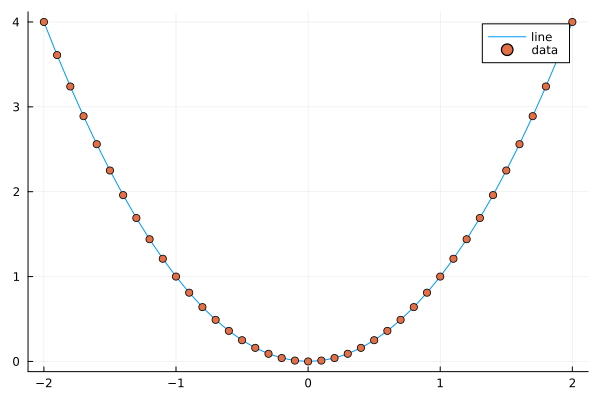

In [65]:
plot(x,y,label="line")
scatter!(x,y,label="data")

#### Using *plotlyjs* backend

In [69]:
#plotlyjs()

In [ ]:
#plot(x,y,label="line")
#scatter!(x,y,label="data")

### Getting fancier plots

Examine relationship between the global temperature and the number of pirates between roughly 1860 and 2000.

In [70]:
globalTemp = [14, 14.5, 14.8, 15.2, 15.5, 15.8]
numPirates = [45000, 20000, 15000, 5000, 400, 17]

6-element Vector{Int64}:
 45000
 20000
 15000
  5000
   400
    17

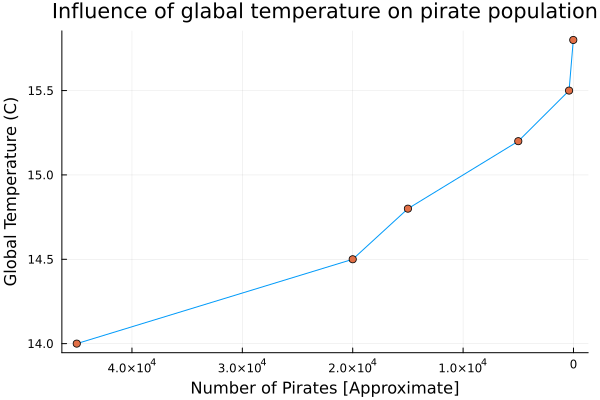

In [71]:
# First plot the data
plot(numPirates,globalTemp, legend = false)
scatter!(numPirates,globalTemp, legend = false)
# Reverse x-axis
xflip!()

# Add titles and labels 
xlabel!("Number of Pirates [Approximate]")
ylabel!("Global Temperature (C)")
title!("Influence of glabal temperature on pirate population")

#### To create plot with subplots

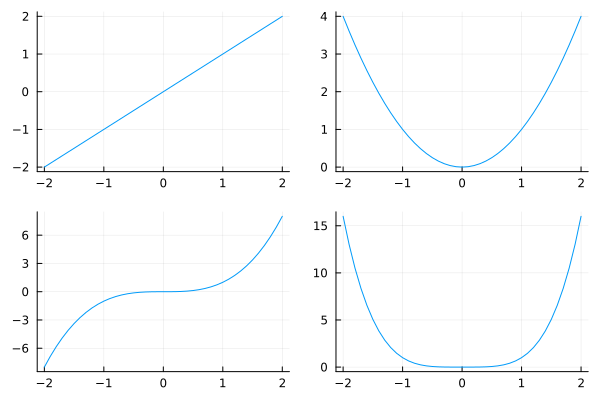

In [72]:
p1 = plot(x,x)
p2 = plot(x,x.^2)
p3 = plot(x,x.^3)
p4 = plot(x,x.^4)
plot(p1,p2,p3,p4,layout=(2,2),legend=false)

## Multiple dispatch

One of the key features of Julia is Multiple dispatch that makes softwares:

- fast
- extensible 
- programmable
- fun to play with

In [1]:
methods(+)

# 190 methods for generic function "+":
[1] +(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:87
[2] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigInt) in Base.GMP at gmp.jl:528
[3] +(c::Union{Int16, Int32, Int64, Int8}, x::BigInt) in Base.GMP at gmp.jl:534
[4] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigFloat) in Base.MPFR at mpfr.jl:376
[5] +(c::Union{Int16, Int32, Int64, Int8}, x::BigFloat) in Base.MPFR at mpfr.jl:384
[6] +(c::Union{Float16, Float32, Float64}, x::BigFloat) in Base.MPFR at mpfr.jl:392
[7] +(x::Union{Dates.CompoundPeriod, Dates.Period}) in Dates at /opt/julia-1.6.2/share/julia/stdlib/v1.6/Dates/src/periods.jl:362
[8] +(y::AbstractFloat, x::Bool) in Base at bool.jl:102
[9] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.Bidiagonal) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/bidiag.jl:354
[10] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.UpperTriangular) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:94
[11] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.UnitUpperTriangular) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:94
[12] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.LowerTriangular) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:94
[13] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.UnitLowerTriangular) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:94
[14] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.Diagonal) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:115
[15] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.Tridiagonal) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:183
[16] +(A::LinearAlgebra.Bidiagonal, B::LinearAlgebra.SymTridiagonal) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:203
[17] +(A::LinearAlgebra.Bidiagonal{var"#s832", V} where {var"#s832"<:Number, V<:AbstractVector{var"#s832"}}, B::LinearAlgebra.UniformScaling) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:236
[18] +(J::LinearAlgebra.UniformScaling) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/uniformscaling.jl:150
[19] +(J::LinearAlgebra.UniformScaling, x::Number) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/uniformscaling.jl:145
[20] +(J1::LinearAlgebra.UniformScaling, J2::LinearAlgebra.UniformScaling) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/uniformscaling.jl:151
[21] +(J::LinearAlgebra.UniformScaling, B::BitMatrix) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/uniformscaling.jl:153
[22] +(J::LinearAlgebra.UniformScaling, F::LinearAlgebra.Hessenberg) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/hessenberg.jl:560
[23] +(A::LinearAlgebra.UniformScaling, B::LinearAlgebra.Tridiagonal{var"#s832", V} where {var"#s832"<:Number, V<:AbstractVector{var"#s832"}}) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:245
[24] +(A::LinearAlgebra.UniformScaling, B::LinearAlgebra.SymTridiagonal{var"#s832", V} where {var"#s832"<:Number, V<:AbstractVector{var"#s832"}}) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:250
[25] +(A::LinearAlgebra.UniformScaling, B::LinearAlgebra.Bidiagonal{var"#s832", V} where {var"#s832"<:Number, V<:AbstractVector{var"#s832"}}) in LinearAlgebra at /opt/julia-1.6.2/share/julia/stdlib/v1.6/LinearAlgebra/src/special.jl:255
[26] +(A::LinearAlgebra.UniformScaling, B::LinearAlgebra.Diagonal{var"#s832", V} where {var"#s832"<:Number, V<:AbstractVector{var"#s832"}}) in LinearAlgebra at /opt/julia-1.6.2/share/julia/

Use **@which** macro to learn which method we are using when we call **+**

In [2]:
@which 3 + 3

+(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:87

In [3]:
@which 3.0 + 3.0

+(x::Float64, y::Float64) in Base at float.jl:326

In [4]:
@which 3 + 3.0 

+(x::Number, y::Number) in Base at promotion.jl:321

#### We can extend **+** by defining new methods for it

Supose we want to concatenate two strings by + sign 

In [5]:
import Base: +

In [6]:
"hello " + "world"

LoadError: MethodError: no method matching +(::String, ::String)
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560

In [7]:
@which "hello "+"world"

LoadError: no unique matching method found for the specified argument types

In [8]:
+(x:: String, y:: String) = string(x,y)

+ (generic function with 191 methods)

In [9]:
"hello "+"world"

"hello world"

In [10]:
@which "hello "+"world"

+(x::String, y::String) in Main at In[8]:1

It works! Let's check it for another example.

In [11]:
foo(x,y) = println("duck-typed foo!")
foo(x::Int,y::Float64) = println("foo with an integer and a float!")
foo(x::Float64,y::Float64) = println("foo with two floats!")
foo(x::Int,y::Int) = println("foo with two integers!")

foo (generic function with 4 methods)

In [ ]:
foo(1,2)

In [ ]:
foo(1,2.0)

In [ ]:
foo(1.0,2.0)

In [ ]:
foo(true,false)